<a href="https://colab.research.google.com/github/GaurangRaje/ALU/blob/main/DIP_exp3_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import cv2
import random
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math

# Importing the low contrast image in greyscale form

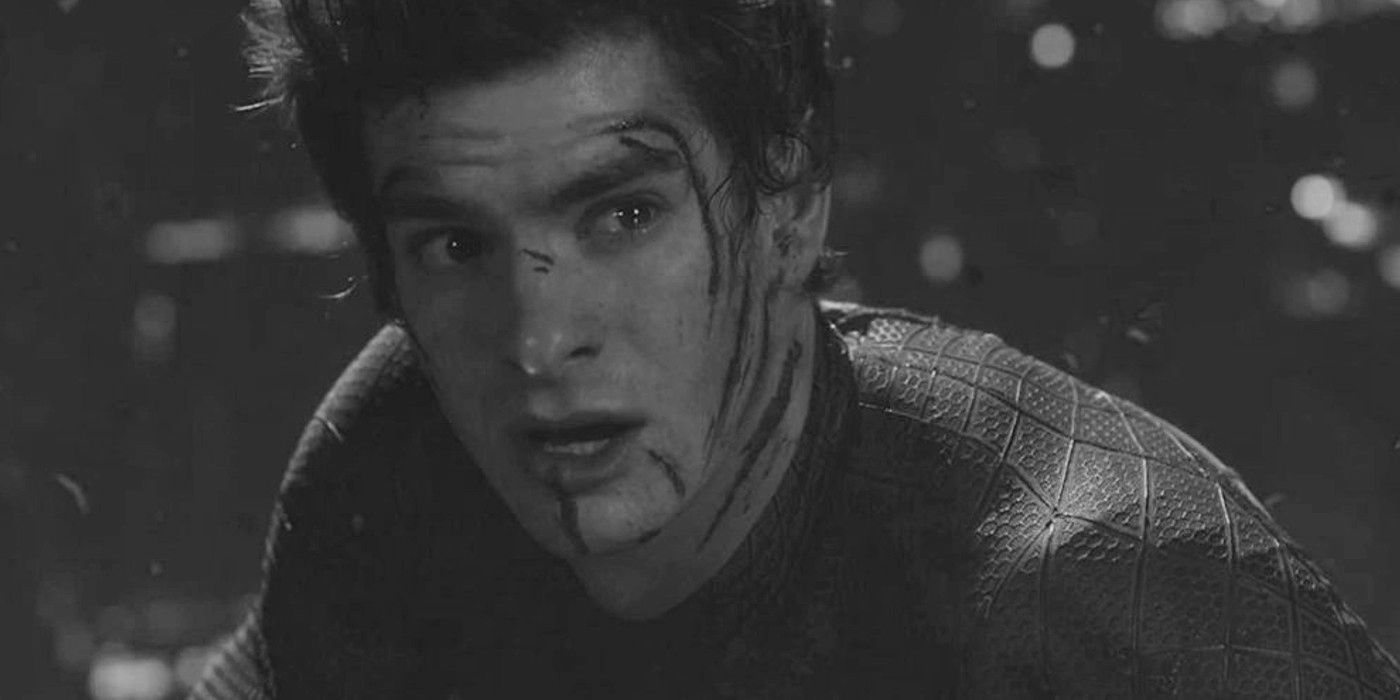

In [ ]:
img = cv2.imread("/content/ag_nwh.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

# Defining plot histogram helper function

In [ ]:
def plot_histogram(dictionary):
  x = list(dictionary.keys())
  y = list(dictionary.values())
  plt.bar(x, y)

# Equalise function
## equalise histogram of image passed to it

In [ ]:
def equalise(src_img):
  img = src_img.copy()
  histogram_dict = dict()
  for row in img:
    for pixel in row:
      histogram_dict[pixel] = histogram_dict.get(pixel, 0) + 1

  plot_histogram(histogram_dict)

  number_of_pixels = sum(histogram_dict.values())
  p_x = [pixel / number_of_pixels for pixel in histogram_dict.values()]
  cdf = [p_x[0]]
  for idx in range(1, len(p_x)):
    cdf.append(cdf[idx - 1] + p_x[idx])
  
  l = len(histogram_dict)
  cdf_x = [c * (l - 1) for c in cdf]
  new_grey_level = [math.ceil(cx) for cx in cdf_x]
  new_histogram_dict = {k: val for k, val in zip(new_grey_level, histogram_dict.values())}

  return new_histogram_dict

# Testing on above imported image

## Original image histogram

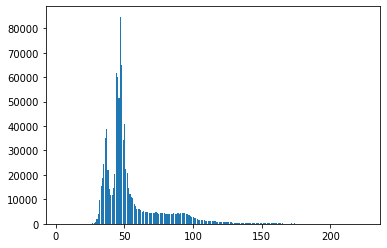

In [ ]:
new_hist = equalise(img)

# Equalised histogram

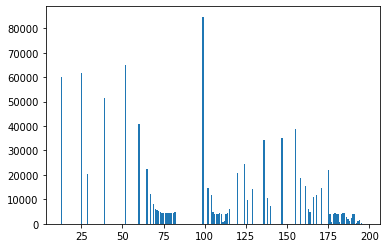

In [ ]:
plot_histogram(new_hist)

# Testing on standard cameraman image

## Importing the image

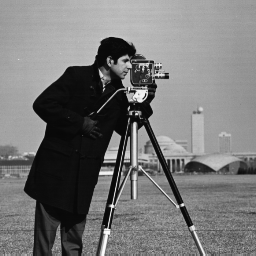

In [ ]:
cameraman = cv2.imread("/content/cameraman.tif", cv2.IMREAD_GRAYSCALE)
cv2_imshow(cameraman)

## Orignal image histogram

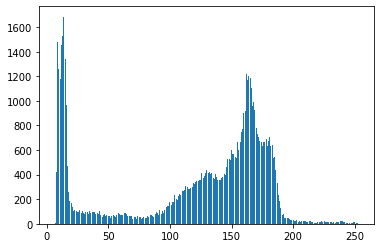

In [ ]:
equalised_hist = equalise(cameraman)

# Equalised histogram

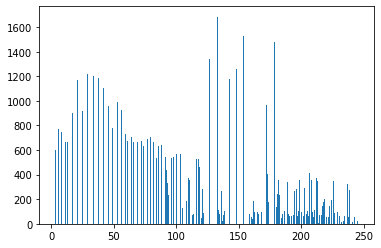

In [ ]:
plot_histogram(equalised_hist)